In [24]:
import json
import sqlite3
import numpy as np

from gameSimulation.jsonDeEncoders import decodingHooks

from datetime import datetime

from scipy import stats

# %config InlineBackend.figure_formats = ['svg']
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mplTicker
import matplotlib.style as mplstyle
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

mplstyle.use('fast')
mplstyle.use('default')
# mpl.rcParams['figure.figsize'] = [20, 10]

colors = ["green", "blue", "red","orange","purple","yellow"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)






In [25]:
con = sqlite3.connect("G:/Uni/BA/data/gameHistories.db")
distinctSettings = con.execute(
    '''select gameSettingsID from gameSettings where gameSettingsID < 3''').fetchall()
con.row_factory = lambda _, row: row[0]
# labels = [json.loads(d, object_hook=decodingHooks).getName() for d in con.execute(
labels = [[json.loads(d, object_hook=decodingHooks).getName() for d in con.execute(
    '''select dice from gameSettings where gameSettingsID == (?)''',
    i).fetchall()][0] for i in distinctSettings]
roundCounts = [con.execute(
    '''select roundcount from game where gameSettingsID == (?)''',
    i).fetchall() for i in distinctSettings]
stepCounts = [con.execute(
    '''select stepcount from game where gameSettingsID == (?)''',
    i).fetchall() for i in distinctSettings]
dicethrows_raw = [[item for sublist in [json.loads(dr) for dr in con.execute(
    '''select diceroll from game where gameSettingsID == (?)''', i).fetchall()]for item in sublist] for i in distinctSettings]

con.close()
labels

['Multi D2 (4)', 'Multi D2 (3)', 'Multi D2 (3) 0->3 ']

In [26]:



dicethrows = dicethrows_raw 
[[dt.count(x) for x in range(0,5)]  for dt in dicethrows]

[[14230, 56617, 85161, 56368, 14331],
 [36472, 109568, 109758, 36679, 0],
 [0, 84289, 84181, 28081, 27936]]

In [27]:
colors[:len(stepCounts)]


['green', 'blue', 'red']

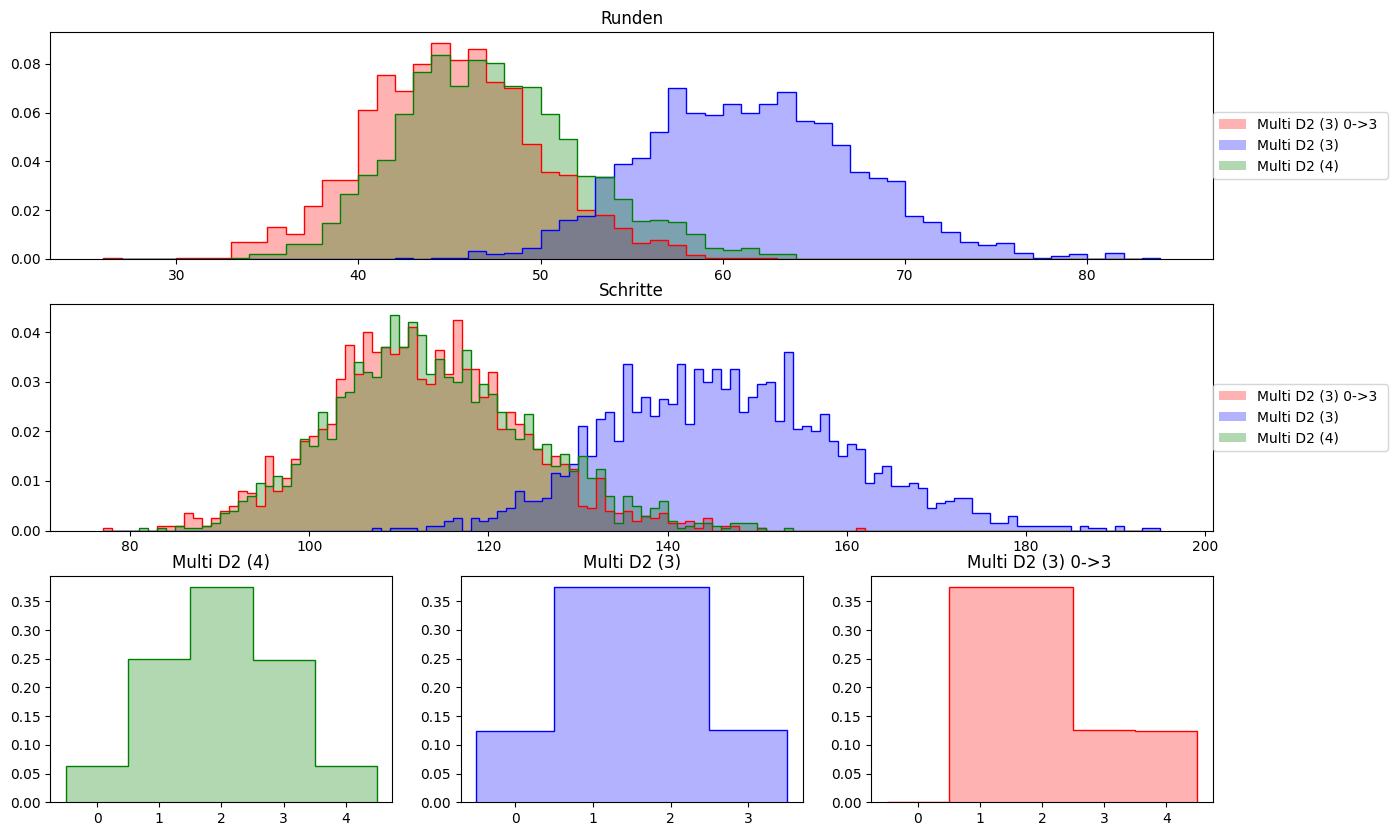

In [28]:
fig, ax = plt.subplot_mosaic([["Runden"]*len(labels), ["Schritte"]*len(labels), labels], figsize=[15, 10])

# for i,gl_stacked_ in enumerate(gl_stacked):
#         ax.bar([x for x, _ in gl_stacked_], [
#                 y for _, y in gl_stacked_], alpha=0.5, label=xlabels[i])
#         # ax.plot(gl[i], alpha=0.5)
ax["Runden"].set_title("Runden")
bins = range(min(min(roundCounts)), max(max(roundCounts))+2)
ax["Runden"].hist(roundCounts, color=colors[:len(roundCounts)], density=True, histtype="step",
           bins=bins)
ax["Runden"].hist(roundCounts, color=colors[:len(roundCounts)], label=labels, density=True, histtype="stepfilled",
           alpha=.3, bins=bins)

ax["Schritte"].set_title("Schritte")
bins = range(min(min(stepCounts)), max(max(stepCounts))+2)
ax["Schritte"].hist(stepCounts, color=colors[:len(stepCounts)], density=True,  histtype="step",
           bins=bins)
ax["Schritte"].hist(stepCounts, color=colors[:len(stepCounts)], label=labels, density=True, histtype="stepfilled",
           alpha=.3, bins=bins)


for i, label in enumerate(labels):
    ax[label].set_title(label)
    bins = range(0, max(dicethrows[i])+2)
    ax[label].hist(dicethrows[i], color=colors[i],
                   density=True,  histtype="step",align="left", bins=bins)
    ax[label].hist(dicethrows[i], color=colors[i], label=labels,
                   density=True, histtype="stepfilled", align="left", alpha=.3, bins=bins)

for name in ax:
    if name not in labels:
        ax[name].legend(bbox_to_anchor=(1, .5),
                loc='center left', borderaxespad=0.)

In [29]:
[{"strats":[s.getName() for s in gs[i].getStrategies()],"min":np.min(gl_),"median":np.median(gl_),"avg":np.average(gl_),"max":np.max(gl_)} for i,gl_ in enumerate(gl)]

NameError: name 'gl' is not defined

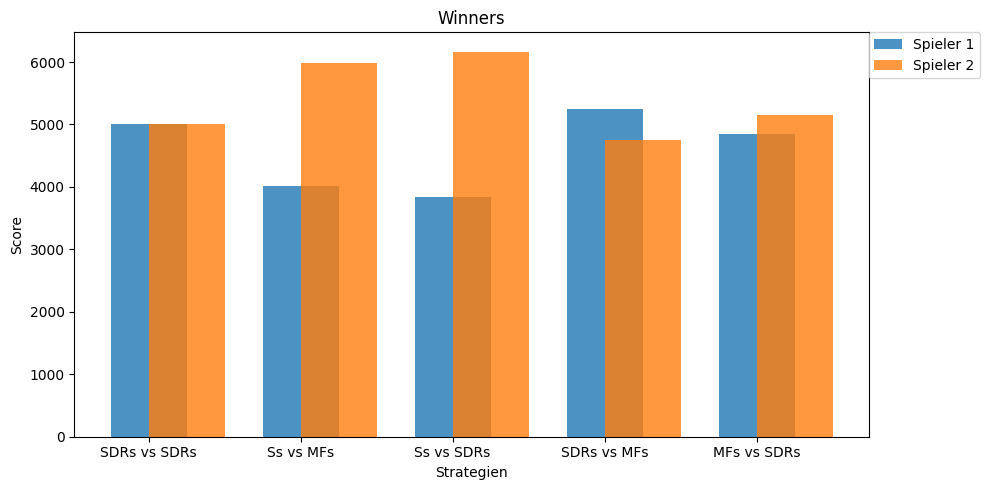

In [ ]:
# xlabels = ['No Influence', 'fight', 'fight incl. double']
# xlabels = ["MultiD2Dice(4)",
# "MultiD2Dice(3)",
# "MultiD2DiceNo0(3)",
# "D4()"]
# xlabels=["MF vs MF","S vs MF","S vs S"]
player0 = [[[p.getID() for p in g["winner"]]for g in s].count([0])for s in h]
player1 = [[[p.getID() for p in g["winner"]]for g in s].count([1])for s in h]

fig, ax = plt.subplots(figsize=[10,5])
# hat_graph(ax, xlabels, [player0, player1], ['Player 0', 'Player 1'])

ax.bar(xlabels,player0,label="Spieler 1", alpha=.8,width=.5)
ax.bar(xlabels,player1,label="Spieler 2", alpha=.8,width=.5,align="edge")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Strategien')
ax.set_ylabel('Score')
ax.set_title('Winners')
ax.legend( bbox_to_anchor=(1, 1),
          loc='upper left', borderaxespad=0.)

fig.tight_layout()
plt.show()


In [31]:
[*[10]*10]

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]